### Analysis

In [7]:
%pip install numexpr pandas --upgrade

     -------------------------------------- 141.2/141.2 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.3
    Uninstalling numexpr-2.8.3:
      Successfully uninstalled numexpr-2.8.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lando\\anaconda3\\Lib\\site-packages\\~umexpr\\interpreter.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\lando\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lando\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\lando\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [7]:
cubelets = [f'{i}' for i in range(20)]

def load_store(filename: str) -> pd.DataFrame:
    with open(filename, 'rb') as f:
        arr = np.frombuffer(f.read(), dtype=np.uint8).reshape((-1, 21))
    df = pd.DataFrame(arr, columns=cubelets + ['depth'])
    return df

In [12]:
depth2 = load_store('../depth_2.store')
depth3 = load_store('../depth_3.store')

In [14]:
depth2['depth'].value_counts()

depth
2    1347
1      45
0       1
Name: count, dtype: int64

In [16]:
depth3['depth'].value_counts()

depth
3    37344
2     1318
1       45
0        1
Name: count, dtype: int64

In [20]:
depth2.query('depth == 2').merge(depth3.query('depth == 3'), on=cubelets, how='inner')

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,depth_x,depth_y


In [28]:
in_depth2 = depth2.query('depth == 2').set_index(cubelets)
not_in_depth3 = in_depth2.drop(depth3.query('depth == 2').set_index(cubelets).index).reset_index()

In [29]:
not_in_depth3

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,depth
0,2,5,5,8,0,2,5,5,2,5,...,5,2,5,5,8,0,2,5,5,2
1,19,5,18,19,18,19,5,18,7,9,...,9,19,5,18,19,18,19,5,18,2
2,16,16,16,8,8,16,16,16,6,6,...,6,16,16,16,8,8,16,16,16,2
3,17,17,17,8,8,16,16,16,4,4,...,6,17,17,17,8,8,16,16,16,2
4,2,5,19,8,19,2,5,19,2,7,...,7,2,5,19,8,19,2,5,19,2
5,2,5,2,8,8,16,16,16,2,2,...,6,2,5,2,8,8,16,16,16,2
6,8,0,8,8,8,2,5,2,8,8,...,2,8,0,8,8,8,2,5,2,2
7,18,5,5,18,0,18,5,5,9,5,...,5,18,5,5,18,0,18,5,5,2
8,5,5,19,0,19,5,5,19,5,7,...,7,5,5,19,0,19,5,5,19,2
9,17,17,17,8,8,2,5,2,4,4,...,2,17,17,17,8,8,2,5,2,2


In [30]:
not_in_depth3.dtypes

0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
5        uint8
6        uint8
7        uint8
8        uint8
9        uint8
10       uint8
11       uint8
12       uint8
13       uint8
14       uint8
15       uint8
16       uint8
17       uint8
18       uint8
19       uint8
depth    uint8
dtype: object

In [32]:
print(not_in_depth3.shape)
len(not_in_depth3.values.tobytes())

(29, 21)


609

In [33]:
29 * 21

609

In [ ]:
def write_store(df: pd.DataFrame, filename: str):
    assert all(dtype == np. for dtype in df.dtypes)
    with open(filename, 'wb') as f:
        f.write(df.value.tobytes

In [5]:
cubelets = [f'{i}' for i in range(20)]

In [44]:
import seaborn as sns

In [45]:
def hist_group_by(x, group_by, df):
    for (group, subset) in df.groupby(group_by):
        plt.title(f'{group_by} = {group}')
        plt.hist(subset[x], bins=np.arange(-0.5, 41.5, 1.0))
        plt.xlim(-1, 41)
        plt.show()

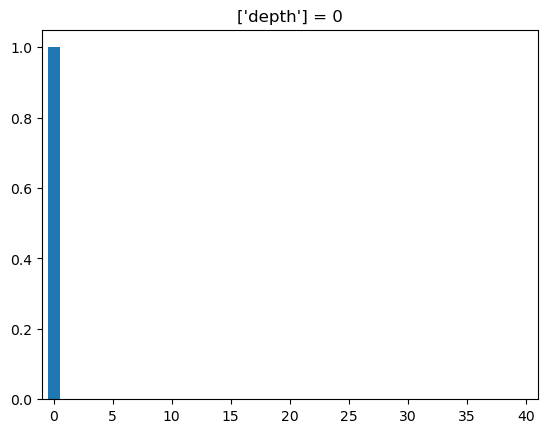

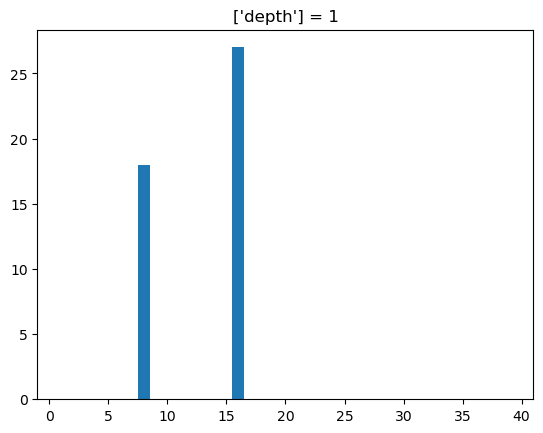

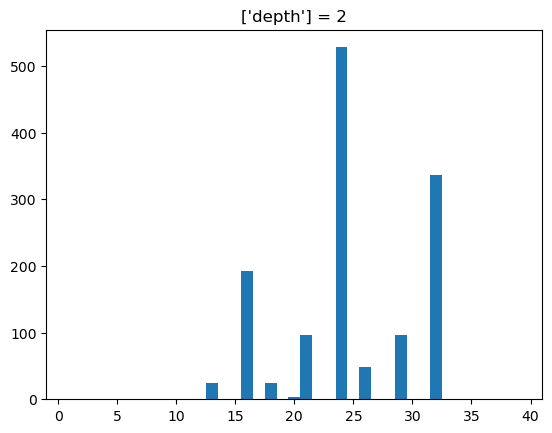

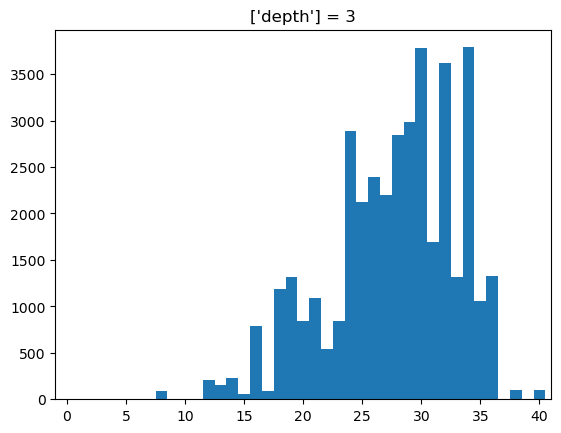

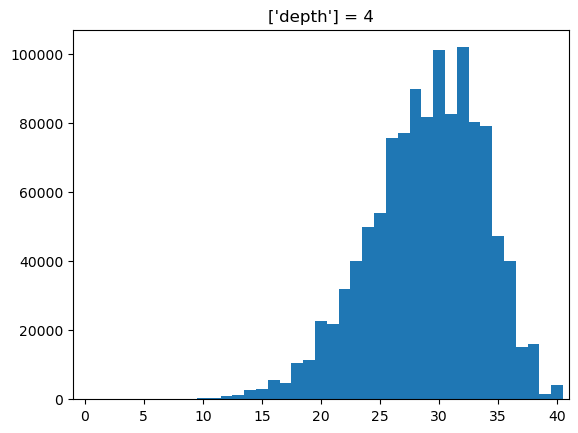

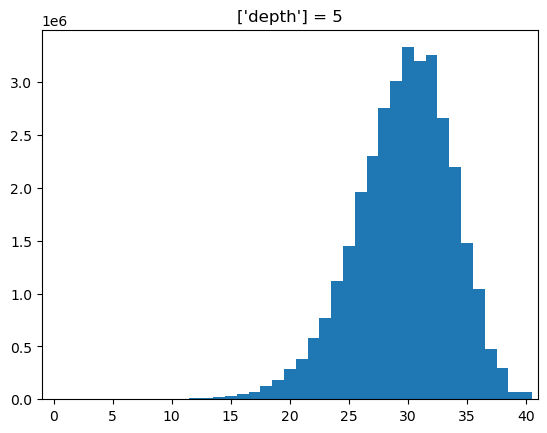

In [46]:
hist_group_by('parity', ['depth'], df)

In [47]:
df.query('parity == 40 and depth == 5').shape

(69818, 2)